<a href="https://colab.research.google.com/github/Meledre/Dataton_2022/blob/main/DATATON_%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B0_%22Full_stack_senior_procrastinators%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Команда "Full stack senior procrastinators"



###Импорт

In [216]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from PIL import Image

###Классы

In [217]:
classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trachea_segmentation.v1i.png-mask-semantic/test/_classes.csv')
classes

,Pixel Value,Class
0,0,background
1,1,trachea
2,2,trachea-normal


###Конвертация

In [218]:
# конвертация изображений из jpeg в png (на локальном диске)
from PIL import Image
import glob

for file in glob.glob("*.jpg"):
    im = Image.open(file)
    im.save(file.replace("jpg","png"))

###Преобразование в формат DataFrame

In [219]:
names = '/content/drive/MyDrive/Colab Notebooks/trachea_PNG' 
names_lst = os.listdir(names) 
mask = '/content/drive/MyDrive/Colab Notebooks/mask_PNG'
mask_lst = os.listdir(mask) 

In [244]:
# сортировка имен файлов для сопоставления
def sort_num(list):
    return list[7:]

img_sort = sorted(names_lst, key=sort_num)
print(img_sort)

mask_sort = sorted(mask_lst, key=sort_num)
print(mask_sort)

data_sort = zip(img_sort,mask_sort)
index = [i for i in range(1,len(img_sort)+1)]

['IM-0001-0001_png.rf.c7696c0dbef8d06d963344c655981b2d.png', 'IM-0001-0001_png.rf.d6a48c061c5b5e2bbb9a14f8e32ad743.png', 'IM-0001-0002_png.rf.71b2acbed3fa56540a85b225b429d108.png', 'IM-0001-0002_png.rf.d25c5512b25dff8b75b865a3ee9f4a49.png', 'IM-0001-0003_png.rf.8b12ccd65c574258c737d3323ccf5e69.png', 'IM-0001-0003_png.rf.a10b82252bdabb89d63fcbe8ef0f5a41.png', 'IM-0001-0004_png.rf.38c331a07ab40bb8790781e7e9f751b7.png', 'IM-0001-0004_png.rf.b0e0562f6b9a6b6a8e86902694e229d1.png', 'IM-0001-0004_png.rf.d0904cfd10507668f3d6ccdb5698d35f.png', 'IM-0001-0005_png.rf.1057fe10fcb06d0034810c70e8beafc8.png', 'IM-0001-0005_png.rf.730499b26b1e59c22f4b92712c3add3a.png', 'IM-0001-0005_png.rf.b68133758b4861f6f762914696a4f8db.png', 'IM-0001-0006_png.rf.51a1bdc0b1c889f7a3b452b61d63db87.png', 'IM-0001-0006_png.rf.e7a4235e27c91c31eb0a0fbd9c96b3c2.png', 'IM-0001-0006_png.rf.e8d86f1065aaa63016f1b40d93062a05.png', 'IM-0001-0007_png.rf.8e68f74d7da00780cee858da50306c38.png', 'IM-0001-0007_png.rf.9344d9036ddcfd9527

In [221]:
trachea_data = pd.DataFrame(data_sort, index=index)

In [222]:
trachea_data.columns=['imgID','maskID']
trachea_data

,imgID,maskID
1,IM-0001-0001_png.rf.c7696c0dbef8d06d963344c655...,IM-0001-0001_jpg.rf.c7696c0dbef8d06d963344c655...
2,IM-0001-0001_png.rf.d6a48c061c5b5e2bbb9a14f8e3...,IM-0001-0001_jpg.rf.d6a48c061c5b5e2bbb9a14f8e3...
3,IM-0001-0002_png.rf.71b2acbed3fa56540a85b225b4...,IM-0001-0002_jpg.rf.71b2acbed3fa56540a85b225b4...
4,IM-0001-0002_png.rf.d25c5512b25dff8b75b865a3ee...,IM-0001-0002_jpg.rf.d25c5512b25dff8b75b865a3ee...
5,IM-0001-0003_png.rf.8b12ccd65c574258c737d3323c...,IM-0001-0003_jpg.rf.8b12ccd65c574258c737d3323c...
...,...,...
394,IM-0001-0133_png.rf.c9cf18d6c4bcd759f60c919a21...,IM-0001-0133_jpg.rf.c9cf18d6c4bcd759f60c919a21...
395,IM-0001-0134_png.rf.dfa87041e10f7292fcda6bfcfc...,IM-0001-0134_jpg.rf.dfa87041e10f7292fcda6bfcfc...
396,IM-0001-0135_png.rf.591f25330b462ca82f0ff94709...,IM-0001-0135_jpg.rf.591f25330b462ca82f0ff94709...
397,IM-0001-0139_png.rf.c03d2a63f91d2f58c4d9392a69...,IM-0001-0139_jpg.rf.c03d2a63f91d2f58c4d9392a69...


In [223]:
#сравнение с полученной таблицей
print("Number of DICOM Images:", len(names_lst))

Number of DICOM Images: 398


In [224]:
def readImg(img):
    image = plt.imread(img)
    return image

In [233]:
# 1 срез
img = readImg('/content/drive/MyDrive/Colab Notebooks/trachea_PNG/IM-0001-0001_png.rf.c7696c0dbef8d06d963344c655981b2d.png')
img.shape  

(512, 512, 3)

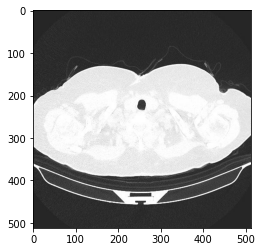

In [234]:
plt.imshow(img,cmap = 'gray')

In [235]:
# 1 срез маски
mask = readImg('/content/drive/MyDrive/Colab Notebooks/mask_PNG/IM-0001-0001_jpg.rf.c7696c0dbef8d06d963344c655981b2d_mask.png')
mask.shape 

(512, 512)

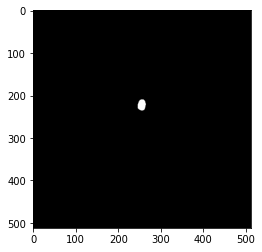

In [236]:
plt.imshow(mask, cmap='gray')

##Ссылки на датасет без разметки: 
https://disk.yandex.ru/d/62Kku4ujS0SBWQ (с целевым признаком)

https://disk.yandex.ru/d/sxYUlbvuFYNa_A (без целевого признака)

##Ссылка на датасет с разметкой:
https://disk.yandex.ru/d/EJduy38OlAh4Lg (все изображения в формате png)

##Результы тренировки на собранном датасете в Roboflow

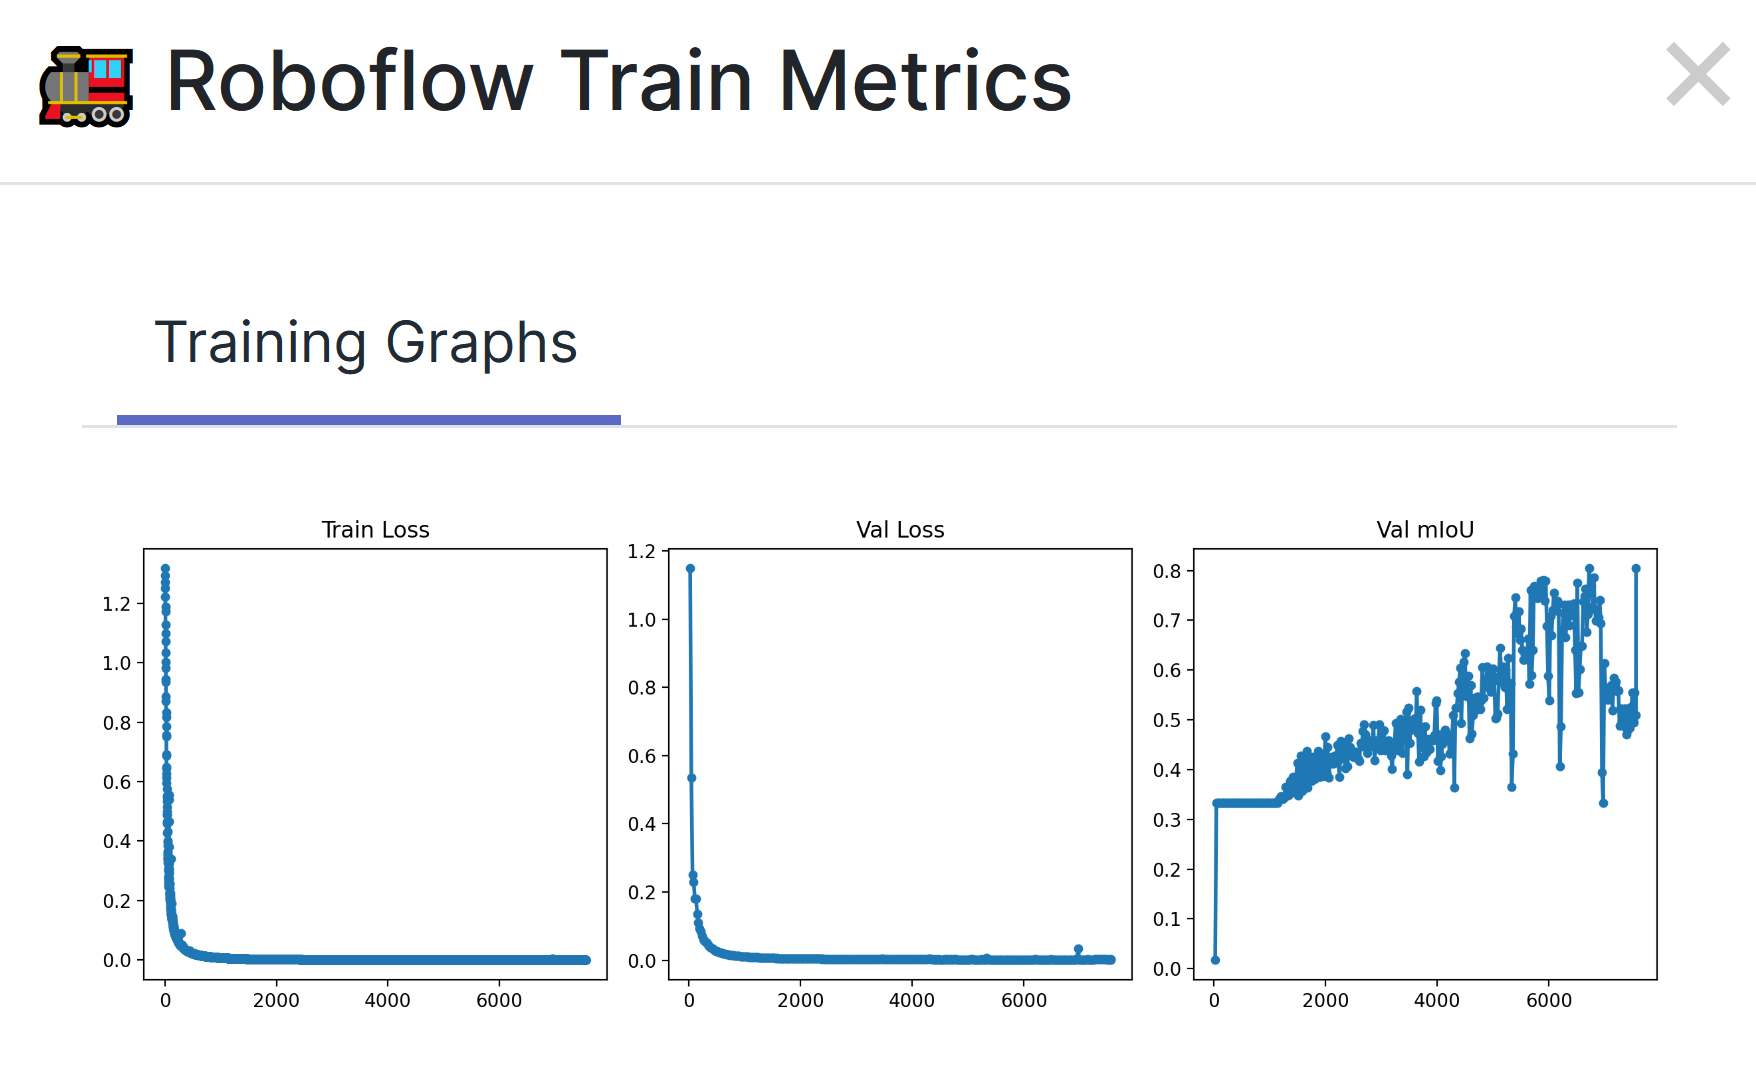